In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
print("Iris DataFrame:")
df.head()

Iris DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (105, 4)
Test set size: (45, 4)


In [3]:
# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [4]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
<ipython-input-6-3af055d5214c>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j].iloc[:, 0], X[y == j].iloc[:, 1],


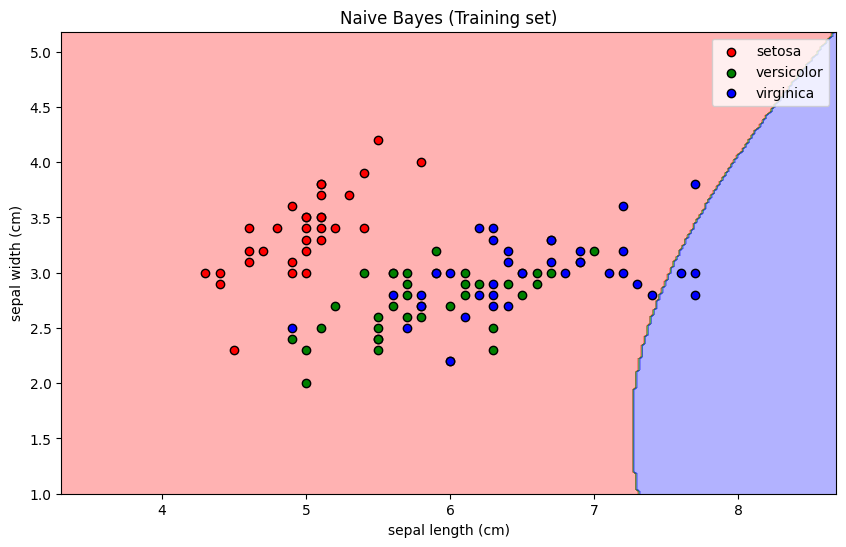

In [6]:
# Function to plot decision boundary for Naive Bayes
def plot_decision_boundary(X, y, classifier, title):
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    # Predict class for each point in the meshgrid
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel(),
                                 np.zeros_like(xx1.ravel()), np.zeros_like(xx1.ravel())])
    Z = Z.reshape(xx1.shape)

    # Plot decision boundary and data points
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j].iloc[:, 0], X[y == j].iloc[:, 1],
                    c=ListedColormap(('red', 'green', 'blue'))(i),
                    label=iris.target_names[j], edgecolors='black')

    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()

# Plot decision boundary on training set using all features
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, nb_classifier, 'Naive Bayes (Training set)')
plt.show()

